# Results

We will present the results of the metrics in this notebook.

In [6]:
%matplotlib inline

from results_preparation import *

## Sum of the ROI divided by the Total sum

In [7]:
folder = "../../XAI_metrics/metrics/"

### Saliency Maps

#### All Values

Mean value of initial beat: 25.02 +- 18.23%
Mean value of final beat: 30.34 +- 9.17%


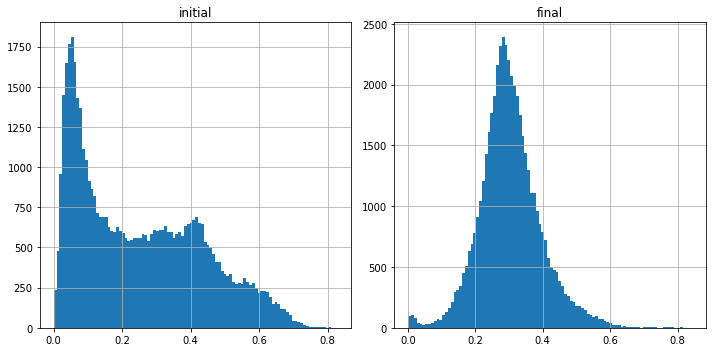

In [8]:
present_values(folder, "saliency")

#### All But 0's

Mean value of initial beat: 27.93 +- 18.75%
Mean value of final beat: 28.40 +- 9.85%


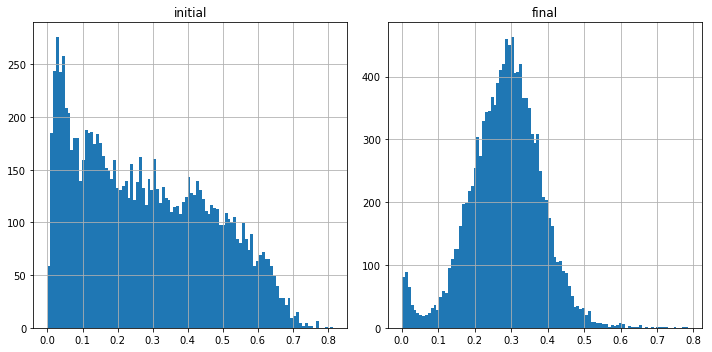

In [4]:
present_values(folder,"saliency", 0)

#### Correct Classification

Mean value of initial beat: 5.62 +- 13.79%
Mean value of final beat: 6.86 +- 13.02%


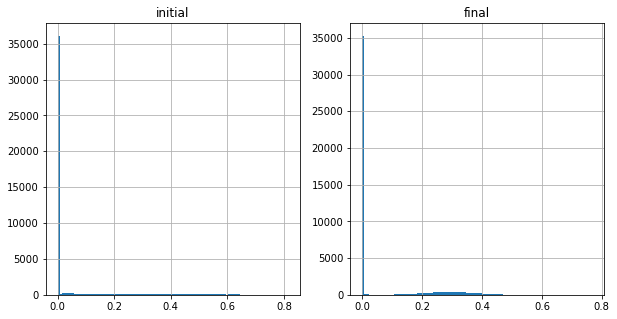

In [5]:
present(folder, "saliency", ['pred_results', 'ok'], but_zeros=False)

#### Incorrect Classification

Mean value of initial beat: 11.10 +- 19.83%
Mean value of final beat: 10.64 +- 15.88%


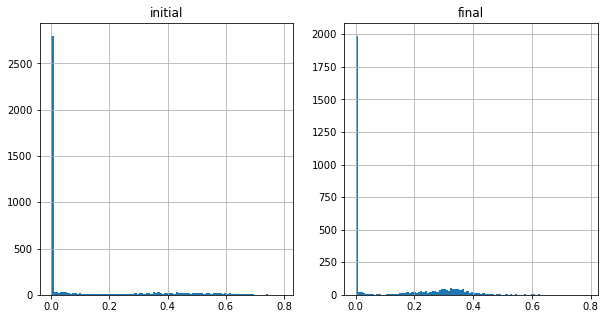

In [6]:
present(folder, "saliency", ['pred_results', 'wrong'], but_zeros=False)

#### Normal Label

Mean value of initial beat: 4.13 +- 11.17%
Mean value of final beat: 5.75 +- 11.70%


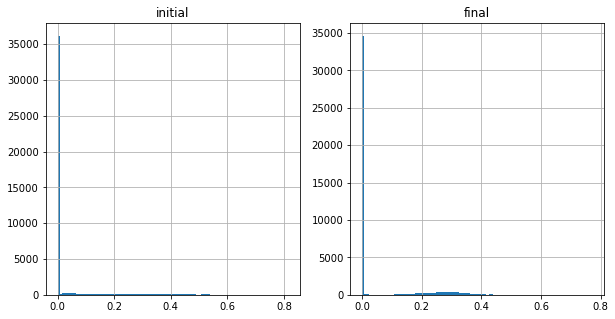

In [7]:
present(folder, "saliency", ['true_labels', 'normal'], but_zeros=False)

#### Abnormal Label

Mean value of initial beat: 21.87 +- 24.79%
Mean value of final beat: 18.06 +- 18.85%


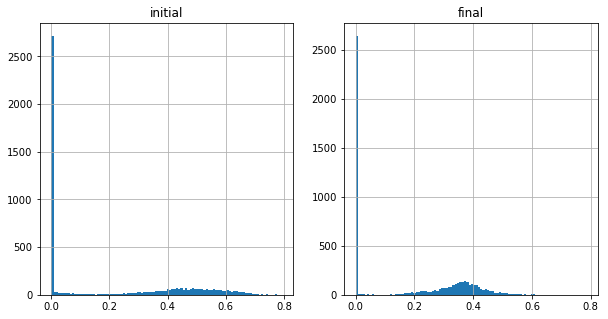

In [8]:
present(folder,"saliency", ['true_labels', 'abnormal'], but_zeros=False)

# Accuracy classification: 
* **final**: 0.9366
* **mid**: 0.9341
* **initial**: 0.9172

# Attention Maps Comparison

In [9]:
#folder = '../../data/attribution_maps/' # RUI
folder_maps = "/mnt/Media/bernardo/attribution_maps_revisited/"

In [10]:
maps_comparison("final", "saliency_map", "abnormal", folder_maps)

FileNotFoundError: [WinError 3] O sistema não conseguiu localizar o caminho especificado: '/mnt/Media/bernardo/attribution_maps_revisited/attribution_maps_no_grid/attribution_maps/saliency_map/label_final_beat/abnormal'